In [86]:
import numpy as np 
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import re
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\varsha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\varsha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Pipeline:


The first step would be to concatenate all the text contained in the articles.

Then split the text into individual sentences.

In the next step, we will find vector representation (word embeddings) for each and every sentence.

Similarities between sentence vectors are then calculated and stored in a matrix.

The similarity matrix is then converted into a graph, with sentences as vertices and similarity scores as edges, for sentence rank calculation.

Finally, a certain number of top-ranked sentences form the final summary


In [87]:
df= pd.read_csv(r"D:\Datasets\NLP_Dataset\tennis_articles.csv",  encoding='ISO-8859-1')

In [88]:
df

,article_id,article_title,article_text,source
0,1,"I do not have friends in tennis, says Maria Sh...",Maria Sharapova has basically no friends as te...,https://www.tennisworldusa.org/tennis/news/Mar...
1,2,Federer defeats Medvedev to advance to 14th Sw...,"BASEL, Switzerland (AP)  Roger Federer advanc...",http://www.tennis.com/pro-game/2018/10/copil-s...
2,3,Tennis: Roger Federer ignored deadline set by ...,Roger Federer has revealed that organisers of ...,https://scroll.in/field/899938/tennis-roger-fe...
3,4,Nishikori to face off against Anderson in Vien...,Kei Nishikori will try to end his long losing ...,http://www.tennis.com/pro-game/2018/10/nishiko...
4,5,Roger Federer has made this huge change to ten...,"Federer, 37, first broke through on tour over ...",https://www.express.co.uk/sport/tennis/1036101...
5,6,Rafael Nadal: World No 1 ARRIVES for Paris Mas...,Nadal has not played tennis since he was force...,https://www.express.co.uk/sport/tennis/1037119...
6,7,"TENNIS.COM PODCAST: POINT DEFENSE, RANKING DRO...","Tennis giveth, and tennis taketh away. The end...",http://www.tennis.com/pro-game/2018/10/tennisc...
7,8,Tennis journalists heartbreaking insight on T...,I PLAYED golf last week with Todd Reid. He pic...,https://www.foxsports.com.au/tennis/tennis-jou...


In [89]:
df['article_text'][0]

"Maria Sharapova has basically no friends as tennis players on the WTA Tour. The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much. I think everyone knows this is my job here. When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net. So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match. I'm a pretty competitive girl. I say my hellos, but I'm not sending any players flowers as well. Uhm, I'm not really friendly or close to many players. I have not a lot of friends away from the courts.' When she said she is not really close to a lot of players, is that something strategic that she is doing? Is it different on the men's tour than the women's tour? 'No, not at all. I think just because you're in the same

### Split text into sentences

In [90]:
sentences= []
for i in df['article_text']:
    sentences.append(sent_tokenize(i))
# # # 
sents= [y for x in sentences for y in x]
sents[0:5]

['Maria Sharapova has basically no friends as tennis players on the WTA Tour.',
 "The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much.",
 'I think everyone knows this is my job here.',
 "When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.",
 "So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match."]

## Text Preprocessing

In [98]:
# remove punctuations, numbers and special characters

clean_sentences= [s.translate(str.maketrans('', '', string.punctuation)) for s in sents]

# lower case the words in the sentences
clean_sentences= [s.lower() for s in clean_sentences if s not  in set(stopwords.words('english'))]

# remove stop word 

In [99]:
clean_sentences[0]

'maria sharapova has basically no friends as tennis players on the wta tour'

### Word Embedding For GloVe

In [91]:
# Extract words from glove
word_embeddings= {}
f= open(r"D:\Datasets\glove.6B\glove.6B.100d.txt", encoding= 'utf-8')

for line in f:
    values= line.split()
    word= values[0]
    coefs= np.asarray(values[1:], dtype= 'float32')
    word_embeddings[word]=coefs
    
f.close()
    
len(word_embeddings)

400000

In [100]:
sent_vector= []

for i in clean_sentences:
    if(len(i)!=0):
        v= sum([word_embeddings.get(w, np.zeros(100,)) for w in i.split()])/(len(i.split())+0.001)
    
    else:
        v= np.zeros((100,))
    sent_vector.append(v)

In [109]:
len(sent_vector),len(sent_vector[0])

(130, 100)

## Similarity Matrix Preparation

In [105]:
# similarity matrix

sim_mat= np.zeros([len(sents), len(sents)])

In [107]:
sim_mat.shape

(130, 130)

In [110]:
from sklearn.metrics.pairwise import cosine_similarity

for i in range(len(sents)):
    for j in range(len(sents)):
        if i!=j:
            sim_mat[i][j]= cosine_similarity(sent_vector[i].reshape(1,100), sent_vector[j].reshape(1,100))[0,0]
            
            

In [114]:
sim_mat.shape, sim_mat[0]

((130, 130),
 array([0.        , 0.88191319, 0.8373999 , 0.89737523, 0.90115052,
        0.78523195, 0.86685914, 0.86473173, 0.88712841, 0.88787115,
        0.9132185 , 0.85715711, 0.89527828, 0.82156688, 0.85905355,
        0.89813852, 0.8853153 , 0.84083295, 0.89650393, 0.87936433,
        0.91134732, 0.89290942, 0.87872429, 0.86130738, 0.87103839,
        0.88211077, 0.89523798, 0.82073283, 0.86311406, 0.90372806,
        0.90586436, 0.91166693, 0.91842797, 0.90016057, 0.84425611,
        0.90680231, 0.88914164, 0.89024973, 0.91236493, 0.92137158,
        0.92140156, 0.83529419, 0.82858851, 0.83718199, 0.90071604,
        0.87197819, 0.91691965, 0.84089481, 0.85857397, 0.8889401 ,
        0.66503233, 0.87548494, 0.90285468, 0.90126628, 0.87937445,
        0.86614734, 0.88714778, 0.85983759, 0.8869096 , 0.90707493,
        0.9171717 , 0.9227187 , 0.91623664, 0.84922816, 0.88089561,
        0.82093995, 0.91659084, 0.84418852, 0.894776  , 0.90489279,
        0.82733513, 0.86413037, 0.8

## Apply PageRank

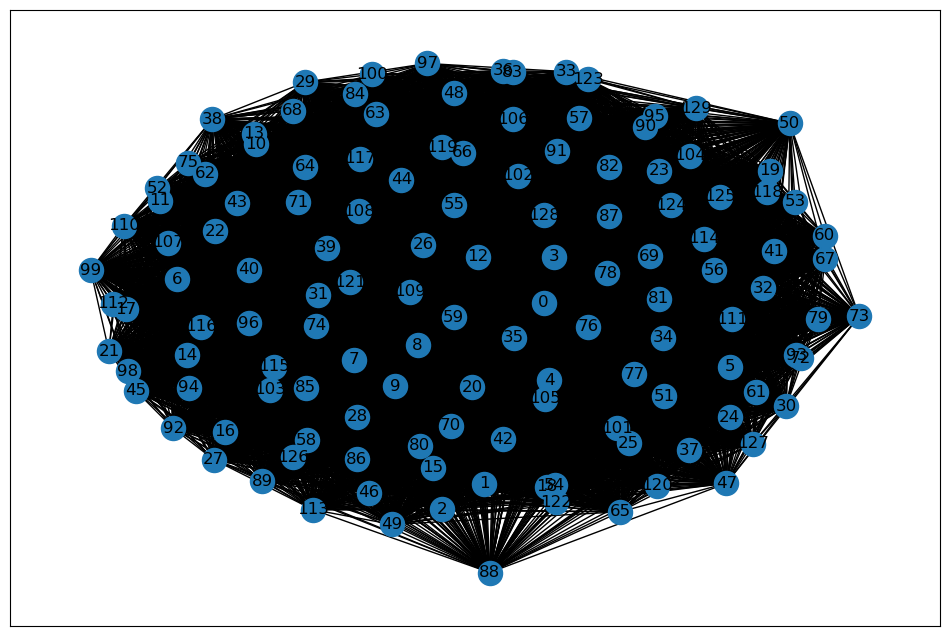

In [140]:
#The nodes of this graph will represent the sentences and the edges will represent the  
#similarity scores between the sentenceThe nodes of this graph will represent the sentences 
#and the edges will represent the similarity scores between the sentences

# convert sim_mat to graph, 
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

nx_graph= nx.from_numpy_array(sim_mat)
scores= nx.pagerank(nx_graph)


plt.figure(figsize=(12,8))
nx.draw_networkx(nx_graph, with_labels=True)


In [126]:
scores[0]

0.0076429163248445675

## Summary Extraction

In [127]:
#extract the top N sentences based on their rankings for summary generation.

ranked_sentences= sorted(((scores[i], s) for i, s in enumerate(sents)), reverse= True)

In [135]:
ranked_sentences[0:3]

[(0.0080330618191045,
  '\x93I was on a nice trajectorythen,\x94 Reid recalled.\x93If I hadn\x92t got sick, I think I could have started pushing towards the second week at the slams and then who knows.\x94 Duringa comeback attempt some five years later, Reid added Bernard Tomic and 2018 US Open Federer slayer John Millman to his list of career scalps.'),
 (0.0080128934447201,
  "So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match."),
 (0.008009634486297906,
  'Speaking at the Swiss Indoors tournament where he will play in Sunday\x92s final against Romanian qualifier Marius Copil, the world number three said that given the impossibly short time frame to make a decision, he opted out of any commitment.')]

In [131]:
# Extract top 10 sentences as summaries

for i in range(10):
    print(ranked_sentences[i][1])

I was on a nice trajectorythen, Reid recalled.If I hadnt got sick, I think I could have started pushing towards the second week at the slams and then who knows. Duringa comeback attempt some five years later, Reid added Bernard Tomic and 2018 US Open Federer slayer John Millman to his list of career scalps.
So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match.
Speaking at the Swiss Indoors tournament where he will play in Sundays final against Romanian qualifier Marius Copil, the world number three said that given the impossibly short time frame to make a decision, he opted out of any commitment.
I just felt like it really kind of changed where people were a little bit, definitely in the '90s, a lot more quiet, into themselves, and then it started to become better. Meanwhile, Federer is hoping he can improve his service game as he hunts his ninth Swiss Indoors title this week.
Major pla